# **EDA🔍**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tensorflow as tf
import os
import xgboost as xgb

from keras import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from keras.metrics import Precision, Recall, AUC, PrecisionAtRecall
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, classification_report
from scipy.stats import normaltest

# Exploratory data analysis
from sklearn.svm import SVC

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pd.set_option('display.expand_frame_repr', False)

# importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/INTELLIGENT AND SECURE NETOWRKS/PROGETTO/Dataset/TimeBasedFeatures-10s-Layer2.csv')

print(dataset.head(5))

   Source IP  Source Port  Destination IP  Destination Port  Protocol  Flow Duration  Flow Bytes/s  Flow Packets/s  Flow IAT Mean   Flow IAT Std  ...  Bwd IAT Min  Active Mean  Active Std  Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  label
0  10.0.2.15        57188  82.161.239.177               110         6        7248168  2.112603e+04       29.110804   34515.085714  273869.262513  ...            7            0           0           0           0          0         0         0         0  AUDIO
1  10.0.2.15        57188  82.161.239.177               110         6        5157723  1.052790e+03        3.683796  286540.166667  878838.525555  ...          451            0           0           0           0          0         0         0         0  AUDIO
2  10.0.2.15        57188  82.161.239.177               110         6             41  1.324390e+07    48780.487805      41.000000       0.000000  ...            0            0           0           0           0         

In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8044 entries, 0 to 8043
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Source IP         8044 non-null   object 
 1   Source Port       8044 non-null   int64  
 2   Destination IP    8044 non-null   object 
 3   Destination Port  8044 non-null   int64  
 4   Protocol          8044 non-null   int64  
 5   Flow Duration     8044 non-null   int64  
 6   Flow Bytes/s      8044 non-null   float64
 7   Flow Packets/s    8044 non-null   float64
 8   Flow IAT Mean     8044 non-null   float64
 9   Flow IAT Std      8044 non-null   float64
 10  Flow IAT Max      8044 non-null   int64  
 11  Flow IAT Min      8044 non-null   int64  
 12  Fwd IAT Mean      8044 non-null   float64
 13  Fwd IAT Std       8044 non-null   float64
 14  Fwd IAT Max       8044 non-null   int64  
 15  Fwd IAT Min       8044 non-null   int64  
 16  Bwd IAT Mean      8044 non-null   float64


In [5]:
print(dataset.shape)

(8044, 29)


In [6]:
print(dataset.describe())

        Source Port  Destination Port  Protocol  Flow Duration  Flow Bytes/s  Flow Packets/s  Flow IAT Mean  Flow IAT Std  Flow IAT Max   Flow IAT Min  ...   Bwd IAT Max   Bwd IAT Min   Active Mean  Active Std    Active Max    Active Min     Idle Mean  Idle Std      Idle Max      Idle Min
count   8044.000000       8044.000000    8044.0   8.044000e+03  8.044000e+03     8044.000000   8.044000e+03  8.044000e+03  8.044000e+03    8044.000000  ...  8.044000e+03  8.044000e+03  8.044000e+03      8044.0  8.044000e+03  8.044000e+03  8.044000e+03    8044.0  8.044000e+03  8.044000e+03
mean   30505.505719      16767.761313       6.0   8.412146e+06  2.707062e+05      706.836422   1.017038e+05  2.436356e+05  1.214898e+06      65.375062  ...  1.139737e+06  5.648311e+04  4.885837e+04         0.0  4.885837e+04  4.885837e+04  5.060547e+05       0.0  5.060547e+05  5.060547e+05
std    22904.243121      22545.613741       0.0   3.062480e+06  1.420024e+06     4391.154798   3.139844e+05  6.377622e+05  2.02683

In [7]:
print(dataset.isnull().sum())

Source IP           0
Source Port         0
Destination IP      0
Destination Port    0
Protocol            0
Flow Duration       0
Flow Bytes/s        0
Flow Packets/s      0
Flow IAT Mean       0
Flow IAT Std        0
Flow IAT Max        0
Flow IAT Min        0
Fwd IAT Mean        0
Fwd IAT Std         0
Fwd IAT Max         0
Fwd IAT Min         0
Bwd IAT Mean        0
Bwd IAT Std         0
Bwd IAT Max         0
Bwd IAT Min         0
Active Mean         0
Active Std          0
Active Max          0
Active Min          0
Idle Mean           0
Idle Std            0
Idle Max            0
Idle Min            0
label               0
dtype: int64


VOIP             2291
BROWSING         1604
P2P              1085
VIDEO             874
FILE-TRANSFER     864
AUDIO             721
CHAT              323
MAIL              282
Name: label, dtype: int64


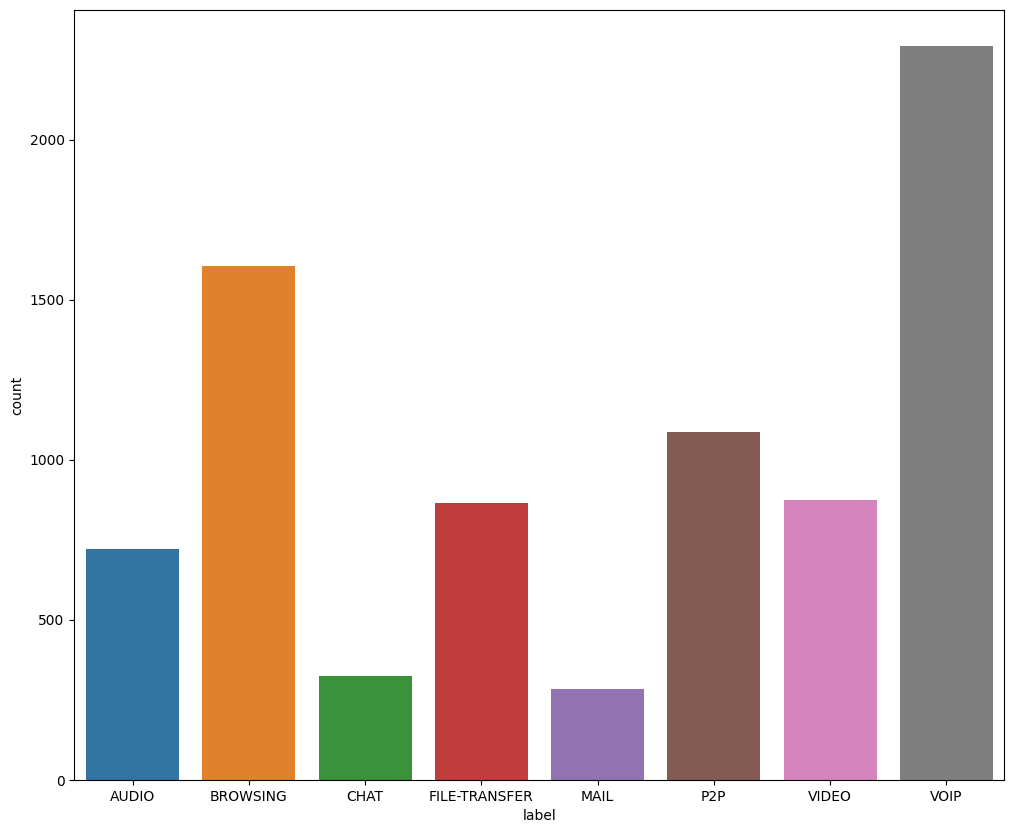

In [8]:
# Numero di classi nella colonna di target
print(dataset['label'].value_counts())

# Esempio di distribuzione delle classi nel target
plt.figure(figsize=(12, 10))
sns.countplot(x='label', data=dataset)
plt.show()

In [9]:
# Numerical_variable
numerical = [var for var in dataset.columns if dataset[var].dtype!='O']
print('\nThere are {} numerical variables'.format(len(numerical)))
print('The numerical variables are :', numerical)

# Categorical_variable
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']
print('\nThere are {} categorical variables'.format(len(categorical)))
print('The categorical variables are :', categorical, "\n")


There are 26 numerical variables
The numerical variables are : ['Source Port', 'Destination Port', 'Protocol', 'Flow Duration', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

There are 3 categorical variables
The categorical variables are : ['Source IP', 'Destination IP', 'label'] 



# **Preprocessing🛠️**

In [10]:
duplicati = dataset[dataset.duplicated()]
num_duplicati = dataset.duplicated().sum()
print('Numero di duplicati: ', num_duplicati)

dataset = dataset.drop_duplicates()
print(dataset.shape)

Numero di duplicati:  6
(8038, 29)


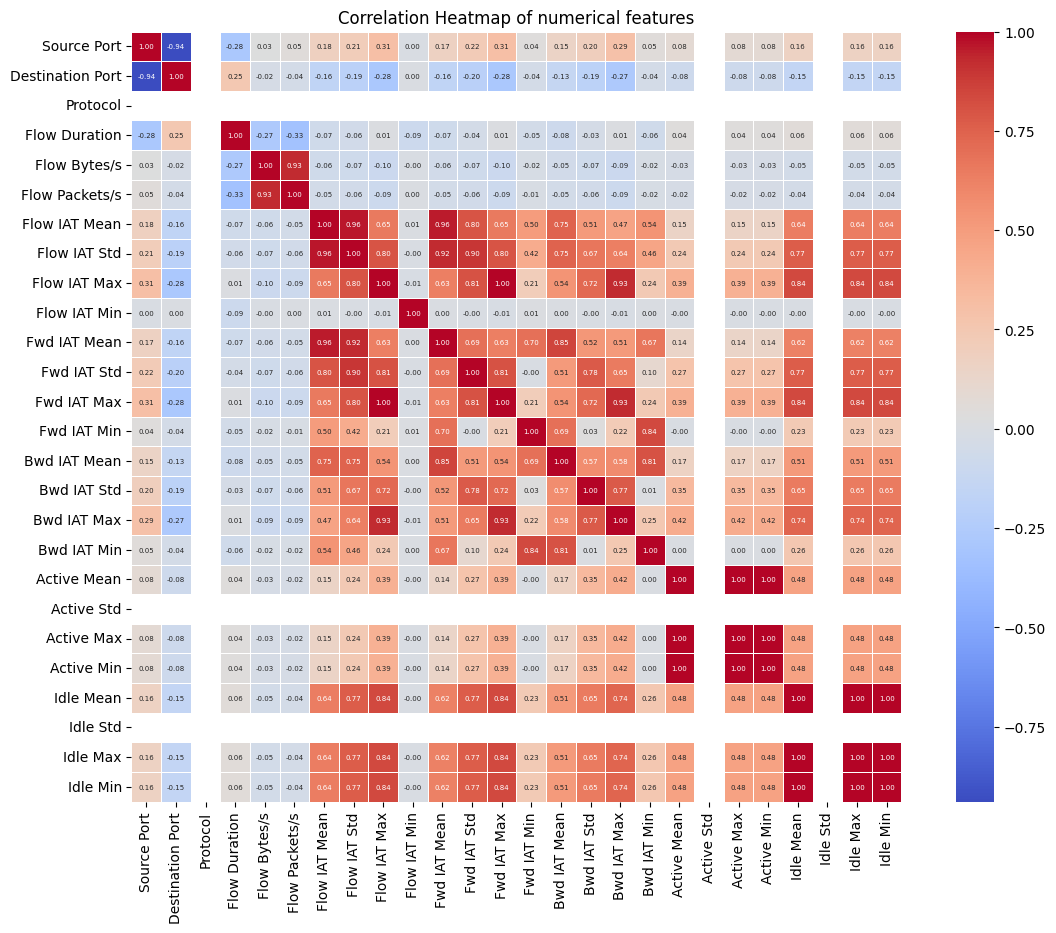

In [11]:
plt.figure(figsize=(14, 10))
plt.title('Correlation Heatmap of numerical features')
ax = sns.heatmap(dataset[numerical].corr(),
                 square=True,
                 annot=True,
                 cmap='coolwarm',
                 fmt=".2f",
                 linewidths=.5,
                 annot_kws={"size": 5})

ax.set_xticks(np.arange(0.5, len(dataset[numerical].columns), 1))
ax.set_yticks(np.arange(0.5, len(dataset[numerical].columns), 1))
ax.set_xticklabels(dataset[numerical].columns, rotation=90, fontsize=10)
ax.set_yticklabels(dataset[numerical].columns, rotation=0, fontsize=10)
plt.show()

In [12]:
print(dataset['Protocol'].value_counts())
print(dataset['Active Std'].value_counts())
print(dataset['Idle Std'].value_counts())

dataset.drop(['Protocol', 'Active Std', 'Idle Std'], axis=1, inplace=True)
numerical.remove('Protocol')
numerical.remove('Active Std')
numerical.remove('Idle Std')
print('The numerical variables are :', numerical)

6    8038
Name: Protocol, dtype: int64
0    8038
Name: Active Std, dtype: int64
0    8038
Name: Idle Std, dtype: int64
The numerical variables are : ['Source Port', 'Destination Port', 'Flow Duration', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Active Mean', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Max', 'Idle Min']


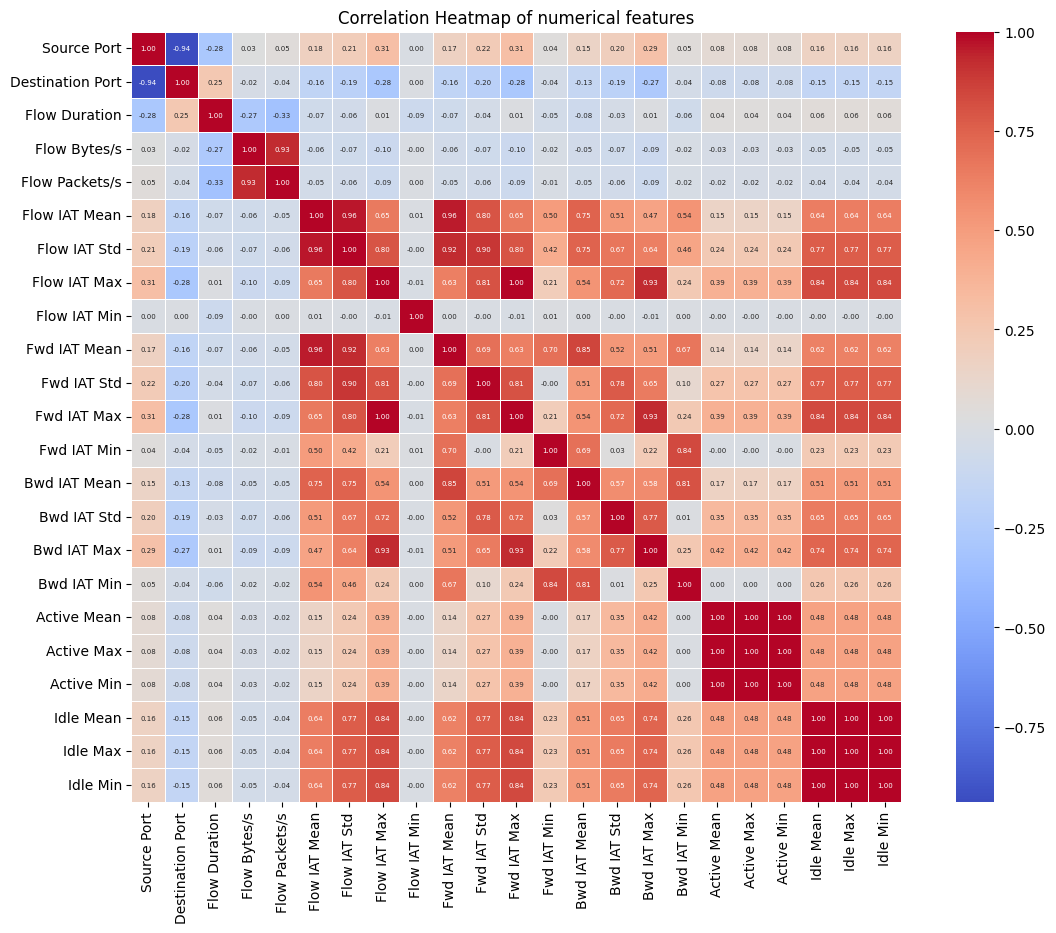

In [13]:
plt.figure(figsize=(14, 10))
plt.title('Correlation Heatmap of numerical features')
ax = sns.heatmap(dataset[numerical].corr(),
                 square=True,
                 annot=True,
                 cmap='coolwarm',
                 fmt=".2f",
                 linewidths=.5,
                 annot_kws={"size": 5})

ax.set_xticks(np.arange(0.5, len(dataset[numerical].columns), 1))
ax.set_yticks(np.arange(0.5, len(dataset[numerical].columns), 1))
ax.set_xticklabels(dataset[numerical].columns, rotation=90, fontsize=10)
ax.set_yticklabels(dataset[numerical].columns, rotation=0, fontsize=10)
plt.show()

In [14]:
columns_to_drop = ['Destination Port',
                   'Flow Bytes/s',
                   'Flow IAT Std',
                   'Fwd IAT Mean',
                   'Fwd IAT Max',
                   'Bwd IAT Max',
                   'Active Max',
                   'Active Min',
                   'Idle Max',
                   'Idle Min']

numerical.remove('Destination Port')
numerical.remove('Flow Bytes/s')
numerical.remove('Flow IAT Std')
numerical.remove('Fwd IAT Mean')
numerical.remove('Fwd IAT Max')
numerical.remove('Bwd IAT Max')
numerical.remove('Active Max')
numerical.remove('Active Min')
numerical.remove('Idle Max')
numerical.remove('Idle Min')


dataset.drop(columns_to_drop, axis=1, inplace=True)

*Ora si vuol mostrare la distribuzione di ciascuna features, così da poter capire come andare ad agire su outlier e normalizzazione.*

In [15]:
# Itera attraverso ogni feature numerica
numerical_features = dataset[numerical].select_dtypes(include=['float64', 'int64'])

# Itera attraverso ogni feature numerica
for column in numerical_features.columns:
    # Esegui il test di D'Agostino e Pearson per la feature corrente
    stat, p_value = normaltest(numerical_features[column])

    # Stampa i risultati del test per la feature corrente
    print(f'Feature: {column}, Statistica del test: {stat}, p-value: {p_value}')

    # Confronto con la soglia di significatività (0.05)
    if p_value > 0.05:
        print("La distribuzione sembra essere gaussiana.")
    else:
        print("La distribuzione non sembra essere gaussiana.")

    print("\n" + "="*50 + "\n")  # Separatore per chiarezza

Feature: Source Port, Statistica del test: 45546.63438227754, p-value: 0.0
La distribuzione non sembra essere gaussiana.


Feature: Flow Duration, Statistica del test: 2589.0440080886865, p-value: 0.0
La distribuzione non sembra essere gaussiana.


Feature: Flow Packets/s, Statistica del test: 12635.339743519857, p-value: 0.0
La distribuzione non sembra essere gaussiana.


Feature: Flow IAT Mean, Statistica del test: 9408.180794199347, p-value: 0.0
La distribuzione non sembra essere gaussiana.


Feature: Flow IAT Max, Statistica del test: 3576.665674737107, p-value: 0.0
La distribuzione non sembra essere gaussiana.


Feature: Flow IAT Min, Statistica del test: 26133.072518165016, p-value: 0.0
La distribuzione non sembra essere gaussiana.


Feature: Fwd IAT Std, Statistica del test: 7427.635774084797, p-value: 0.0
La distribuzione non sembra essere gaussiana.


Feature: Fwd IAT Min, Statistica del test: 16508.831882904633, p-value: 0.0
La distribuzione non sembra essere gaussiana.


Fea

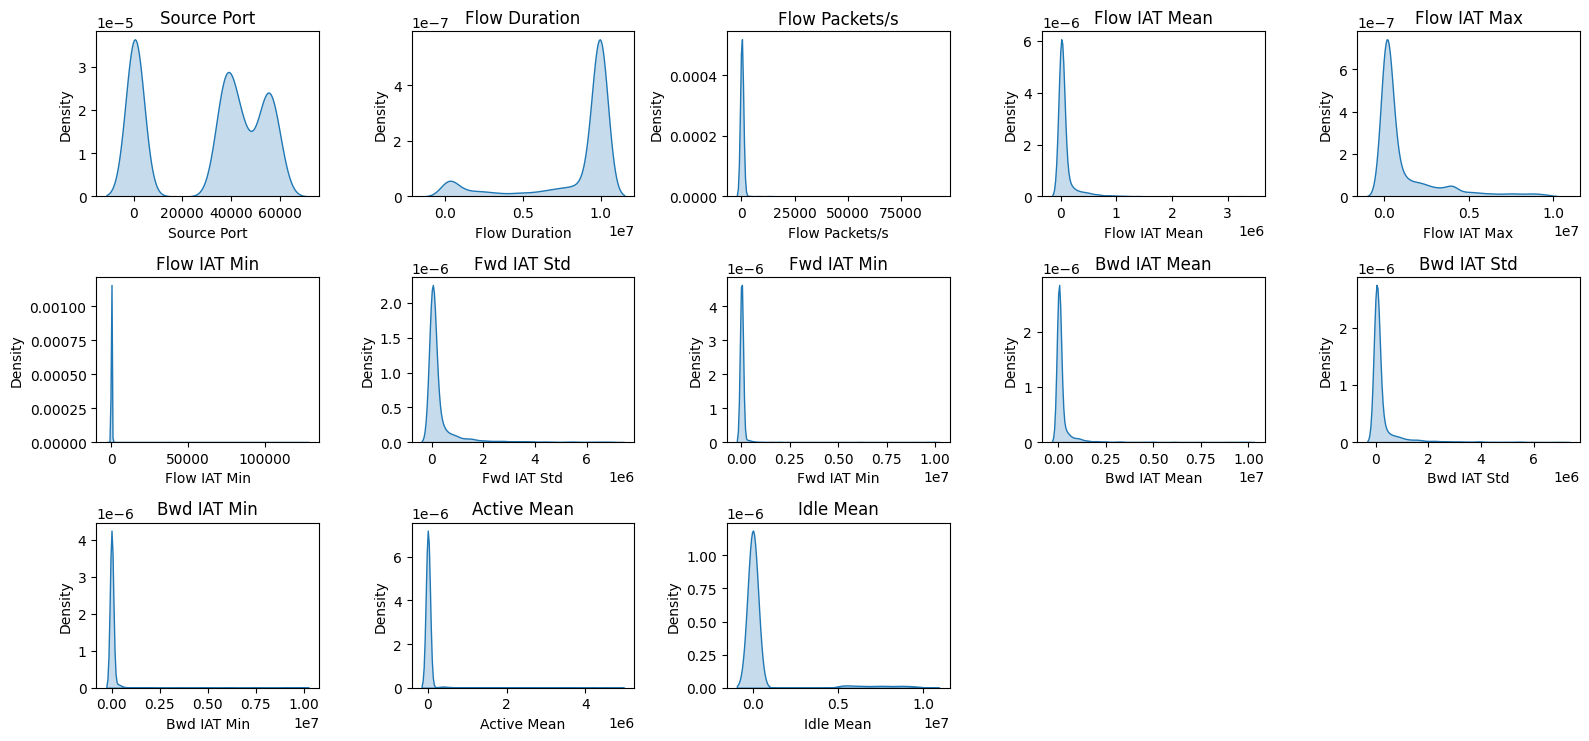

In [16]:
dataset[numerical]

plt.figure(figsize=(16, 12))

for i, column in enumerate(dataset[numerical].columns, 1):
    plt.subplot(5, 5, i)
    sns.kdeplot(dataset[numerical][column], fill=True)
    plt.title(column)

plt.tight_layout()
plt.show()

In [17]:
#def find_drop_outliers_IQR(df, feature):
#    q1 = df[feature].quantile(0.25)
#    q3 = df[feature].quantile(0.75)
#    IQR = q3-q1
#    outliers = df[(df[feature] > q3+1.5*IQR)]
#    print("\nq3+1.5*IQR value for ", feature, " is : ", q3+1.5*IQR)
#    print("The number of ", feature, "Outliers is: : ", len(outliers))
#    df_drop_outliers = df.drop(df[df[feature] > q3 + 1.5 * IQR].index.tolist())
#    print("The dataset length before the drop is: ", df.shape[0], " , while after the drop is: ", df_drop_outliers.shape[0])
#    return df_drop_outliers

In [18]:
#dataset = find_drop_outliers_IQR(dataset, "Fwd IAT Std")

In [19]:
#dataset = find_drop_outliers_IQR(dataset, "Bwd IAT Std")

In [20]:
# Gestione delle features Destination port
print(dataset['Source Port'].value_counts())

bins = [0, 1024, 49152, 65535]
ports = ['Well Known Ports', 'Registered Ports', 'Dynamic or Private Ports']
dataset['Source Port Category'] = pd.cut(dataset['Source Port'], bins=bins, labels=ports)

dataset.drop('Source Port', axis=1, inplace=True)

443      2647
36922     658
41071     508
54453     425
58167     422
         ... 
60740       1
48401       1
33308       1
52803       1
40146       1
Name: Source Port, Length: 69, dtype: int64


In [21]:
#Verifichiamo la correttezza della nuova feature Source Port Category
print(dataset['Source Port Category'].value_counts())
dataset = pd.get_dummies(dataset, columns=['Source Port Category'], drop_first=True, dummy_na=False)
print(dataset.columns)

Registered Ports            3163
Well Known Ports            2774
Dynamic or Private Ports    2101
Name: Source Port Category, dtype: int64
Index(['Source IP', 'Destination IP', 'Flow Duration', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Std',
       'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Min',
       'Active Mean', 'Idle Mean', 'label',
       'Source Port Category_Registered Ports',
       'Source Port Category_Dynamic or Private Ports'],
      dtype='object')


*🔴Non è stata fatta eliminazione di outliers perchè comporterebbe una rimozione di un elevato numero di samples.*

In [22]:
# Categorical_variable
print('\nThere are {} categorical variables'.format(len(categorical)))
print('The categorical variables are :', categorical, "\n")
print(dataset[categorical].head())


There are 3 categorical variables
The categorical variables are : ['Source IP', 'Destination IP', 'label'] 

   Source IP  Destination IP  label
0  10.0.2.15  82.161.239.177  AUDIO
1  10.0.2.15  82.161.239.177  AUDIO
2  10.0.2.15  82.161.239.177  AUDIO
3  10.0.2.15  82.161.239.177  AUDIO
4  10.0.2.15  82.161.239.177  AUDIO


In [23]:
# Numero di classi nella variabili categoriche
print(dataset['Source IP'].value_counts())
print(dataset['Destination IP'].value_counts())

10.0.2.15          5253
198.52.200.39      1559
195.154.107.23     1062
82.161.239.177      127
37.97.149.8          17
195.154.82.180        8
148.251.190.229       5
5.9.123.81            5
195.154.128.151       1
62.75.252.35          1
Name: Source IP, dtype: int64
10.0.2.15          2785
198.52.200.39      2755
195.154.107.23     1662
195.154.82.180      283
82.161.239.177      239
37.97.149.8         168
148.251.190.229      82
5.9.123.81           40
213.239.216.222      21
195.154.126.78        3
Name: Destination IP, dtype: int64


In [24]:
# Funzione per mantenere i valori di Source IP / Destination IP che abbiano almeno 10 occorrenze

def filter_source_ip_by_count(df, column_name, min_occurrences=10):
    # Calcola il conteggio delle occorrenze per ciascun valore di 'Source IP'
    source_ip_counts = df[column_name].value_counts()

    # Seleziona solo i valori che occorrono più di 'min_occurrences' volte
    valid_source_ips = source_ip_counts[source_ip_counts > min_occurrences].index

    # Filtra il DataFrame
    filtered_df = df[df[column_name].isin(valid_source_ips)]

    return filtered_df

In [25]:
dataset = filter_source_ip_by_count(dataset, 'Source IP', min_occurrences=10)
dataset = filter_source_ip_by_count(dataset, 'Destination IP', min_occurrences=10)

In [26]:
# Check
print(dataset['Source IP'].value_counts())
print(dataset['Destination IP'].value_counts())

10.0.2.15         5250
198.52.200.39     1559
195.154.107.23    1062
82.161.239.177     127
37.97.149.8         17
Name: Source IP, dtype: int64
10.0.2.15          2765
198.52.200.39      2755
195.154.107.23     1662
195.154.82.180      283
82.161.239.177      239
37.97.149.8         168
148.251.190.229      82
5.9.123.81           40
213.239.216.222      21
Name: Destination IP, dtype: int64


In [27]:
dataset = pd.get_dummies(dataset, columns=['Source IP', 'Destination IP'], drop_first=True, dummy_na=False)

In [28]:
print(dataset.head(5))

   Flow Duration  Flow Packets/s  Flow IAT Mean  Flow IAT Max  Flow IAT Min   Fwd IAT Std  Fwd IAT Min   Bwd IAT Mean   Bwd IAT Std  Bwd IAT Min  ...  Source IP_37.97.149.8  Source IP_82.161.239.177 Destination IP_148.251.190.229  Destination IP_195.154.107.23  Destination IP_195.154.82.180  Destination IP_198.52.200.39  Destination IP_213.239.216.222  Destination IP_37.97.149.8  Destination IP_5.9.123.81  Destination IP_82.161.239.177
0        7248168       29.110804   34515.085714       3897923             5  4.371676e+05           29   56614.039062  3.498551e+05            7  ...                      0                         0                              0                              0                              0                             0                               0                           0                          0                              1
1        5157723        3.683796  286540.166667       3743359           135  1.272066e+06          509  568901.666667  1

In [29]:
print(dataset.shape)

(8015, 27)


In [30]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8015 entries, 0 to 8043
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Flow Duration                                  8015 non-null   int64  
 1   Flow Packets/s                                 8015 non-null   float64
 2   Flow IAT Mean                                  8015 non-null   float64
 3   Flow IAT Max                                   8015 non-null   int64  
 4   Flow IAT Min                                   8015 non-null   int64  
 5   Fwd IAT Std                                    8015 non-null   float64
 6   Fwd IAT Min                                    8015 non-null   int64  
 7   Bwd IAT Mean                                   8015 non-null   float64
 8   Bwd IAT Std                                    8015 non-null   float64
 9   Bwd IAT Min                                    8015 

# **Initialization of the Dataset🗄️**

In [31]:
X = dataset.drop(columns=['label'])
# Per convertire da True/False a 1/0
X = X.astype(int)

print(X.info())
print(X.head(5))

y = dataset[['label']]

X_train_tot, X_test, y_train_tot, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_tot, y_train_tot, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8015 entries, 0 to 8043
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   Flow Duration                                  8015 non-null   int64
 1   Flow Packets/s                                 8015 non-null   int64
 2   Flow IAT Mean                                  8015 non-null   int64
 3   Flow IAT Max                                   8015 non-null   int64
 4   Flow IAT Min                                   8015 non-null   int64
 5   Fwd IAT Std                                    8015 non-null   int64
 6   Fwd IAT Min                                    8015 non-null   int64
 7   Bwd IAT Mean                                   8015 non-null   int64
 8   Bwd IAT Std                                    8015 non-null   int64
 9   Bwd IAT Min                                    8015 non-null   int64
 10  

In [32]:
# Tre tipologie di nomrmalizzazione
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Adatta e trasforma i dati di addestramento con gli scalatori
X_train_standardized = standard_scaler.fit_transform(X_train)
# Trasforma i dati di convalida e test utilizzando gli scalatori adattati sui dati di addestramento
X_val_standardized = standard_scaler.transform(X_val)
X_test_standardized = standard_scaler.transform(X_test)

X_train_minmax = minmax_scaler.fit_transform(X_train)
X_val_minmax = minmax_scaler.transform(X_val)
X_test_minmax = minmax_scaler.transform(X_test)

X_train_robust = robust_scaler.fit_transform(X_train)
X_val_robust = robust_scaler.transform(X_val)
X_test_robust = robust_scaler.transform(X_test)

# **Support Vector Machines (SVM)📈**

In [33]:
#SVM
svm_model = SVC(kernel='rbf', C=1.0, decision_function_shape='ovr', random_state=42)
t1 = time.monotonic()
svm_model.fit(X_train_standardized, y_train.values.ravel())
t2 = time.monotonic()
print('Time to train the model: {} seconds'.format(t2 - t1))

t3 = time.monotonic()
y_pred = svm_model.predict(X_test_standardized)
t4 = time.monotonic()
print('Time to predict labels for {} samples: {} seconds'.format(X_test_standardized.shape[0], t4 - t3))

Time to train the model: 1.672840516000008 seconds
Time to predict labels for 1603 samples: 0.6836962470000003 seconds


               precision    recall  f1-score   support

        AUDIO       0.86      0.85      0.85       155
     BROWSING       0.86      0.81      0.84       323
         CHAT       0.91      0.48      0.62        61
FILE-TRANSFER       0.71      0.58      0.64       164
         MAIL       0.97      0.50      0.66        66
          P2P       1.00      0.97      0.99       216
        VIDEO       0.59      0.58      0.59       167
         VOIP       0.77      0.98      0.86       451

     accuracy                           0.81      1603
    macro avg       0.83      0.72      0.76      1603
 weighted avg       0.82      0.81      0.80      1603



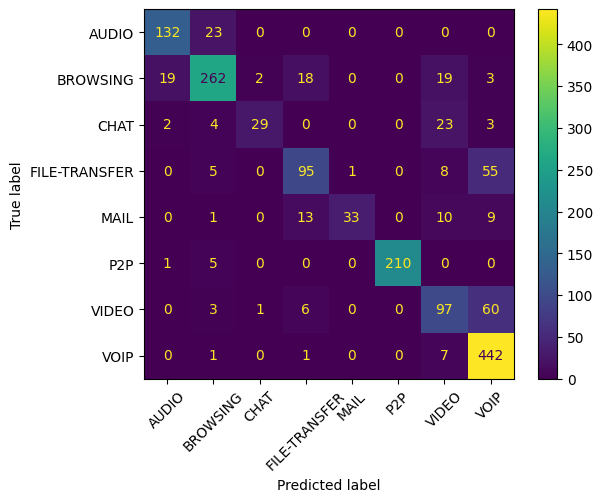

In [35]:
# Calcolo della matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)

# Creazione della heatmap per la matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_model.classes_)
disp_rf.plot(xticks_rotation=45)

# Stampa del riepilogo delle metriche
print(classification_report(y_test, y_pred, target_names=svm_model.classes_))

# **Artificial Neural Network (ANN)🧠**

In [36]:
# Preparazione delle lable
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train.values.ravel())
y_val_encoded = label_encoder.transform(y_val.values.ravel())
y_test_encoded = label_encoder.transform(y_test.values.ravel())

y_train_one_hot = to_categorical(y_train_encoded, num_classes=8)
y_val_one_hot = to_categorical(y_val_encoded, num_classes=8)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=8)

In [37]:
# Crea un modello sequenziale
model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X_train_standardized.shape[1]))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))  # Dropout per ridurre l'overfitting
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=8, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=Precision())#PrecisionAtRecall(recall=1.0))
#early_stopping = EarlyStopping(monitor='val_precision', patience=5)

t4 = time.monotonic()
history = model.fit(X_train_standardized,
                    y_train_one_hot,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val_standardized, y_val_one_hot)
                    )
                    #callbacks=[early_stopping])

t5 = time.monotonic()

print('Time to train the model: {} seconds'.format(t5 - t4))

Epoch 1/10
161/161 [==============================] - 6s 6ms/step - loss: 1.0172 - precision: 0.7843 - val_loss: 0.7202 - val_precision: 0.8270
Epoch 2/10
161/161 [==============================] - 1s 4ms/step - loss: 0.6768 - precision: 0.8034 - val_loss: 0.6020 - val_precision: 0.8847
Epoch 3/10
161/161 [==============================] - 1s 4ms/step - loss: 0.5887 - precision: 0.8331 - val_loss: 0.5374 - val_precision: 0.8501
Epoch 4/10
161/161 [==============================] - 1s 4ms/step - loss: 0.5209 - precision: 0.8553 - val_loss: 0.4895 - val_precision: 0.8557
Epoch 5/10
161/161 [==============================] - 1s 4ms/step - loss: 0.4730 - precision: 0.8706 - val_loss: 0.4583 - val_precision: 0.8612
Epoch 6/10
161/161 [==============================] - 1s 5ms/step - loss: 0.4391 - precision: 0.8747 - val_loss: 0.4087 - val_precision: 0.8814
Epoch 7/10
161/161 [==============================] - 1s 4ms/step - loss: 0.4142 - precision: 0.8815 - val_loss: 0.4296 - val_precision:

In [38]:
# Stampa del riepilogo delle metriche
t23 = time.monotonic()
y_pred2 = model.predict(X_test_standardized)
t24 = time.monotonic()
print('Time to predict labels for {} samples: {} seconds'.format(X_test_standardized.shape[0], t24 - t23))

# Converti le previsioni nel formato delle etichette di classe
y_pred2_labels = label_encoder.inverse_transform(tf.argmax(y_pred2, axis=1).numpy())
y_test2_labels = label_encoder.inverse_transform(tf.argmax(y_test_one_hot, axis=1).numpy())

# Stampa il rapporto di classificazione
print(classification_report(y_test2_labels, y_pred2_labels))

51/51 [==============================] - 0s 2ms/step
Time to predict labels for 1603 samples: 0.26445918699999993 seconds
               precision    recall  f1-score   support

        AUDIO       0.87      0.74      0.80       155
     BROWSING       0.84      0.84      0.84       323
         CHAT       0.75      0.64      0.69        61
FILE-TRANSFER       0.71      0.87      0.78       164
         MAIL       0.94      0.70      0.80        66
          P2P       1.00      0.97      0.99       216
        VIDEO       0.66      0.72      0.69       167
         VOIP       0.96      0.97      0.97       451

     accuracy                           0.86      1603
    macro avg       0.84      0.81      0.82      1603
 weighted avg       0.87      0.86      0.86      1603



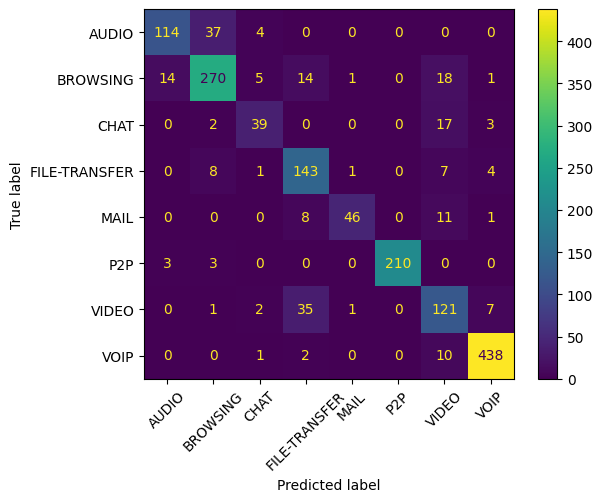

In [39]:
# Creazione della heatmap per la matrice di confusione
conf_matrix = confusion_matrix(y_test2_labels, y_pred2_labels)

# Creazione della heatmap per la matrice di confusione
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp_rf.plot(xticks_rotation=45)

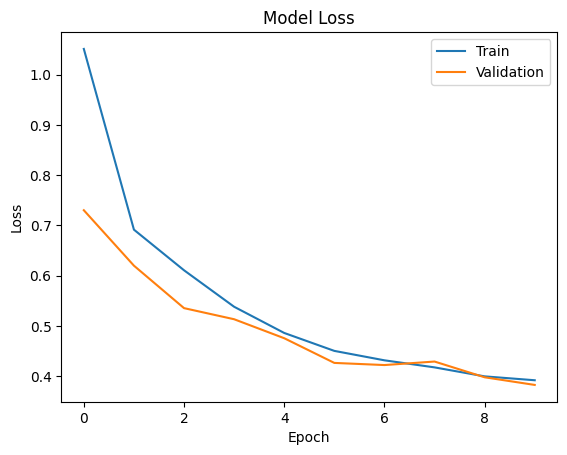

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# **K-Nearest Neighbors (KNN)🏠**

In [ ]:
# KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # Puoi impostare il numero di vicini secondo le tue esigenze

t6 = time.monotonic()
knn_classifier.fit(X_train_minmax, y_train.values.ravel())
t7 = time.monotonic()
print('Time to train the model: {} seconds'.format(t7 - t6))

t8 = time.monotonic()
y_pred3 = knn_classifier.predict(X_test_minmax)
t9 = time.monotonic()
print('Time to predict labels for {} samples: {} seconds'.format(X_test_minmax.shape[0], t9 - t8))

Time to train the model: 0.013918759000034697 seconds
Time to predict labels for 1603 samples: 0.23953154999998105 seconds


               precision    recall  f1-score   support

        AUDIO       0.82      0.83      0.82       155
     BROWSING       0.79      0.84      0.81       323
         CHAT       0.73      0.62      0.67        61
FILE-TRANSFER       0.82      0.82      0.82       164
         MAIL       0.89      0.71      0.79        66
          P2P       1.00      0.98      0.99       216
        VIDEO       0.72      0.79      0.75       167
         VOIP       0.99      0.97      0.98       451

     accuracy                           0.87      1603
    macro avg       0.84      0.82      0.83      1603
 weighted avg       0.87      0.87      0.87      1603



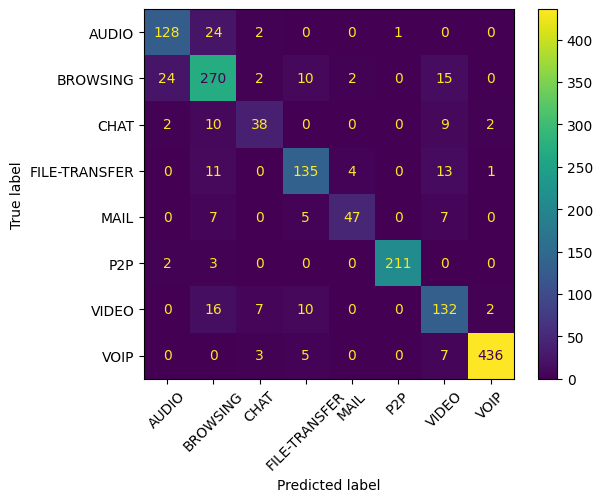

In [ ]:
# Creazione della heatmap per la matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred3)

# Creazione della heatmap per la matrice di confusione
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn_classifier.classes_)
disp_rf.plot(xticks_rotation=45)

# Stampa il rapporto di classificazione
print(classification_report(y_test, y_pred3))

# **Decision Tree (DT)🌳**

In [40]:
#Decision Tree
decision_tree_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

t10 = time.monotonic()
decision_tree_model.fit(X_train_standardized, y_train)
t11 = time.monotonic()

print('Time to train the model: {} seconds'.format(t11 - t10))

t12 = time.monotonic()
y_pred4 = decision_tree_model.predict(X_test_standardized)
t13 = time.monotonic()

print('Time to predict labels for {} samples: {} seconds'.format(X_test_standardized.shape[0], t13 - t12))

Time to train the model: 0.11122099099998195 seconds
Time to predict labels for 1603 samples: 0.0018442729999605945 seconds


               precision    recall  f1-score   support

        AUDIO       0.84      0.81      0.82       155
     BROWSING       0.83      0.84      0.84       323
         CHAT       0.78      0.84      0.81        61
FILE-TRANSFER       0.86      0.91      0.88       164
         MAIL       0.87      0.83      0.85        66
          P2P       0.99      0.97      0.98       216
        VIDEO       0.83      0.84      0.84       167
         VOIP       0.99      0.97      0.98       451

     accuracy                           0.90      1603
    macro avg       0.87      0.88      0.88      1603
 weighted avg       0.90      0.90      0.90      1603



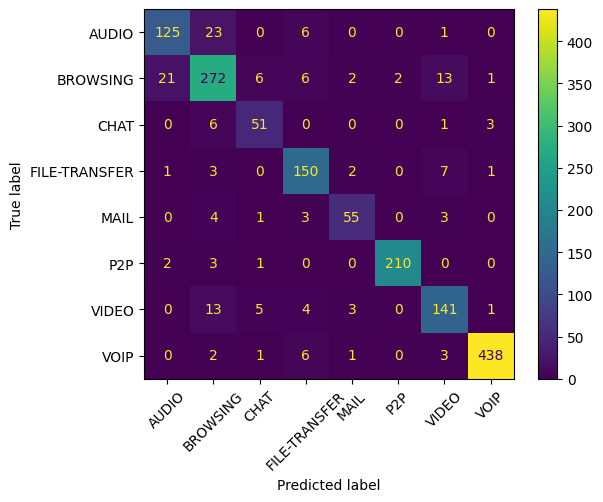

In [41]:
# Creazione della heatmap per la matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred4)

# Creazione della heatmap per la matrice di confusione
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=decision_tree_model.classes_)
disp_rf.plot(xticks_rotation=45)

# Stampa il rapporto di classificazione
print(classification_report(y_test, y_pred4))

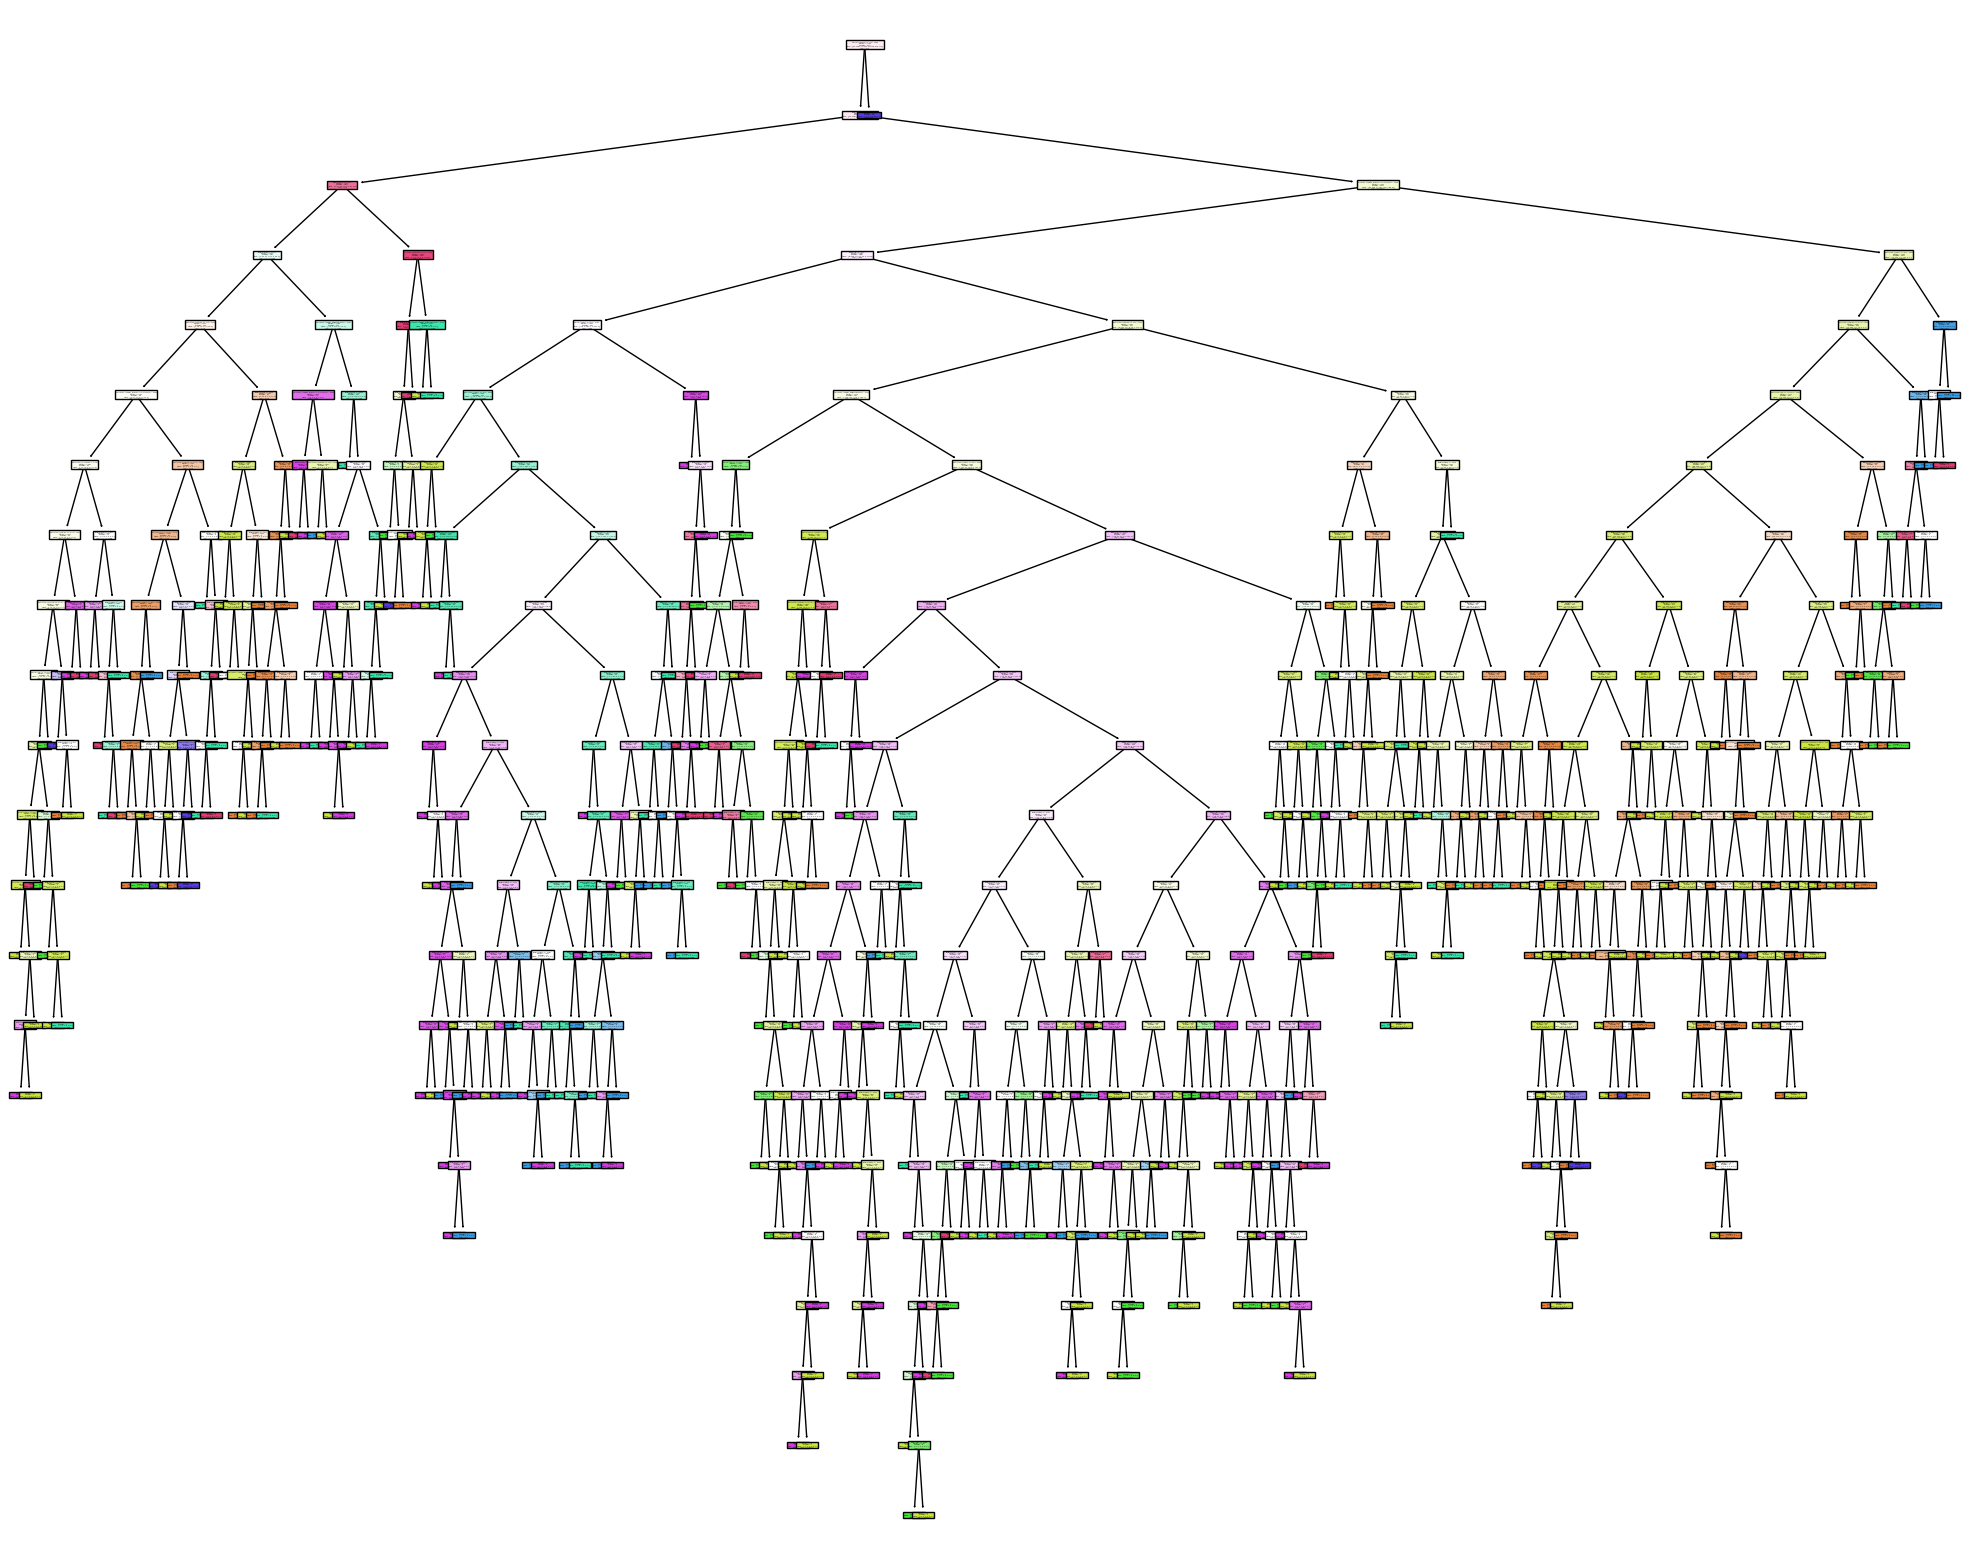

In [42]:
# Visualizzazione della struttura dell'albero utilizzando export_text
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_model,
                   feature_names=X.columns,
                   class_names=decision_tree_model.classes_,
                   filled=True)

In [43]:
fig.savefig("decistion_tree.png")

**Pre-potatura (Limitazione della Profondità):**

---

*Un approccio comune consiste nel limitare la profondità massima dell'albero decisionale durante la sua costruzione. Questo metodo impedisce all'albero di crescere troppo in profondità e diventare eccessivamente complesso. Un albero più superficiale è meno incline a fare overfitting sui dati di addestramento, ma potrebbe mancare della capacità di catturare pattern complessi. È fondamentale perfezionare il limite di profondità attraverso tecniche come la cross-validation per trovare il giusto compromesso tra complessità e prestazioni.*

In [ ]:
# Definisci i parametri da testare
param_grid = {'max_depth': [7, 9, 12, 15, None]}

# Imposta la k-fold cross-validation con StratifiedKFold per mantenere la proporzione delle classi
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Crea un classificatore ad albero decisionale
clf_2 = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Applica GridSearchCV per trovare il miglior parametro
grid_search = GridSearchCV(clf_2, param_grid, cv=cv, scoring='f1_weighted')
grid_search.fit(X_train_standardized, y_train)

# Stampa il miglior parametro
print("Miglior parametro max_depth:", grid_search.best_params_)

# Stampa l'F1 score associato al miglior parametro
print("F1 score con il miglior parametro:", grid_search.best_score_)

Miglior parametro max_depth: {'max_depth': None}
F1 score con il miglior parametro: 0.8792886454534965


**Post-potatura (Potatura sulla Complessità del Costo):**

---

*La post-potatura, anche nota come potatura sulla complessità del costo, implica la costruzione completa dell'albero decisionale e successivamente il ritaglio dei rami che contribuiscono meno all'accuratezza del modello. L'algoritmo assegna un costo a ciascun nodo in base alla sua impurità e al numero di punti dati che rappresenta. Le decisioni di potatura sono prese minimizzando il costo complessivo, favorendo così alberi più semplici che generalizzano meglio.*

*Per la post-potatura, useremo la tecnica di "potatura sulla complessità del costo" (Cost-Complexity Pruning) che è disponibile in scikit-learn. Questa tecnica prevede l'aggiunta di un parametro di complessità, ccp_alpha, che controlla il livello di potatura dell'albero.*

In [44]:
#cost_complexity_pruning_path restituisce un percorso di valori ccp_alpha che corrispondono ai nodi lungo il percorso di potatura.
path = decision_tree_model.cost_complexity_pruning_path(X_train_standardized, y_train)
ccp_alphas, impurities = path.ccp_alphas[:-1], path.impurities[:-1]

# Addestra diversi modelli con valori di ccp_alpha diversi
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train_standardized, y_train)
    clfs.append(clf)

# Valuta gli accuracies dei modelli potati sul set di test
f1_scores = [f1_score(y_val, clf.predict(X_val_standardized), average='weighted') for clf in clfs]

# Trova l'indice del miglior modello (massimizza l'accuratezza)
best_index = f1_scores.index(max(f1_scores))

# Usa il miglior modello potato
best_clf = clfs[best_index]

# Valutazione dell'accuratezza sul set di test dopo la potatura
y_pred_after_pruning = best_clf.predict(X_test_standardized)
f1_score_after_pruning = f1_score(y_test, y_pred_after_pruning, average='weighted')
print(f'F1 score dopo la potatura: {f1_score_after_pruning}')

F1 score dopo la potatura: 0.8900019731325719


In [45]:
# Visualizzazione della struttura dell'albero potato
tree_rules_after_pruning = export_text(best_clf, feature_names=X.columns.tolist())
print("Struttura dell'albero decisionale dopo la potatura:\n", tree_rules_after_pruning)

Struttura dell'albero decisionale dopo la potatura:
 |--- Source IP_195.154.107.23 <= 1.08
|   |--- Flow IAT Max <= -0.53
|   |   |--- Bwd IAT Mean <= -0.27
|   |   |   |--- Flow Duration <= -0.10
|   |   |   |   |--- Destination IP_195.154.107.23 <= 0.73
|   |   |   |   |   |--- Source Port Category_Dynamic or Private Ports <= 0.54
|   |   |   |   |   |   |--- Source IP_82.161.239.177 <= 3.91
|   |   |   |   |   |   |   |--- Destination IP_148.251.190.229 <= 4.66
|   |   |   |   |   |   |   |   |--- Destination IP_5.9.123.81 <= 7.26
|   |   |   |   |   |   |   |   |   |--- Destination IP_198.52.200.39 <= 0.34
|   |   |   |   |   |   |   |   |   |   |--- class: BROWSING
|   |   |   |   |   |   |   |   |   |--- Destination IP_198.52.200.39 >  0.34
|   |   |   |   |   |   |   |   |   |   |--- Fwd IAT Min <= -0.09
|   |   |   |   |   |   |   |   |   |   |   |--- class: VIDEO
|   |   |   |   |   |   |   |   |   |   |--- Fwd IAT Min >  -0.09
|   |   |   |   |   |   |   |   |   |   |   |--- 

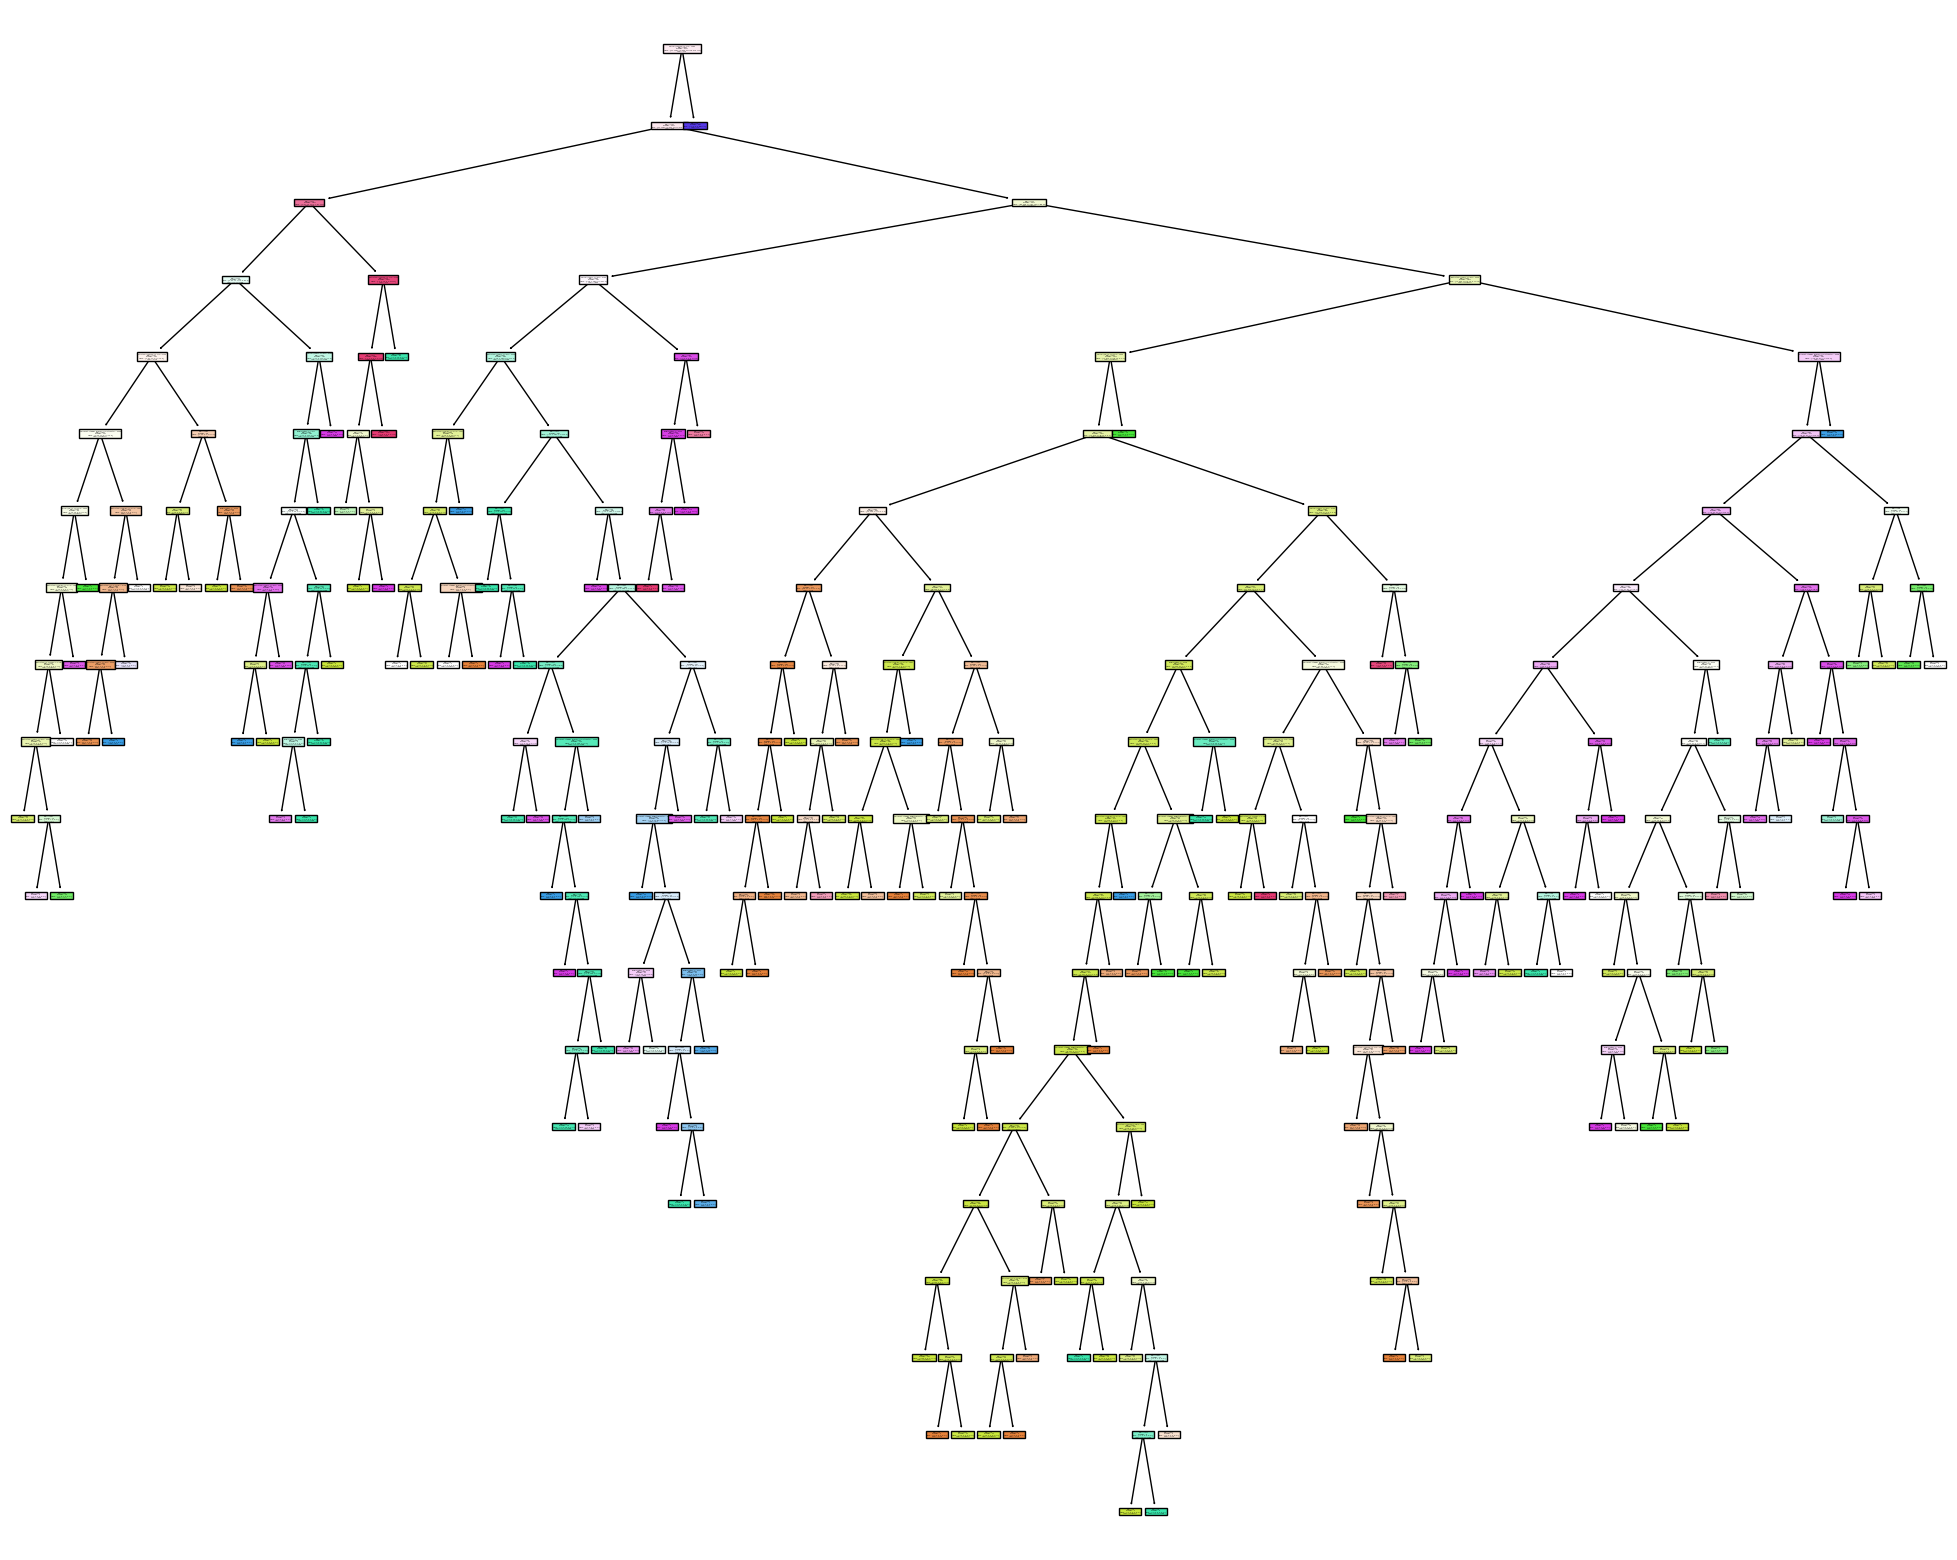

In [46]:
# Visualizzazione della struttura dell'albero dopo la potatura
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_clf,
                   feature_names=X.columns,
                   class_names=best_clf.classes_,
                   filled=True)

In [47]:
fig.savefig("decistion_tree_pruned.png")

*XGBoost implementa un'ottimizzazione dell'algoritmo di gradient boosting, il quale costruisce iterativamente alberi decisionali per compensare gli errori dei modelli precedenti. L'elemento chiave che distingue XGBoost da altri algoritmi di gradient boosting è la gestione avanzata della regolarizzazione, che contribuisce a prevenire l'overfitting e a migliorare le prestazioni generali del modello.*

*La classe XGBClassifier in XGBoost è specificamente progettata per problemi di classificazione. Questa classe sfrutta le caratteristiche distintive di XGBoost per adattarsi e risolvere problemi in cui l'obiettivo è classificare le osservazioni in diverse categorie.*

In [49]:
# Creazione di un oggetto LabelEncoder
label_encoder = LabelEncoder()

# Trasformazione delle etichette di classe in valori numerici
y_train_encoded = label_encoder.fit_transform(y_train.values.ravel())
y_test_encoded = label_encoder.transform(y_test.values.ravel())

xgbc_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Fit
t18 = time.monotonic()
xgbc_model.fit(X_train_standardized, y_train_encoded)
t19 = time.monotonic()

print('Time to train the model: {} seconds'.format(t19 - t18))

# Predict
t20 = time.monotonic()
y_pred7 = xgbc_model.predict(X_test_standardized)
t21 = time.monotonic()

print('Time to predict labels for {} samples: {} seconds'.format(X_test_standardized.shape[0], t21 - t20))

Time to train the model: 1.113919187999727 seconds
Time to predict labels for 1603 samples: 0.023230406000038784 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


               precision    recall  f1-score   support

        AUDIO       0.91      0.85      0.88       155
     BROWSING       0.85      0.89      0.87       323
         CHAT       0.80      0.87      0.83        61
FILE-TRANSFER       0.92      0.91      0.92       164
         MAIL       0.96      0.82      0.89        66
          P2P       1.00      0.98      0.99       216
        VIDEO       0.87      0.93      0.90       167
         VOIP       0.99      0.98      0.99       451

     accuracy                           0.93      1603
    macro avg       0.91      0.90      0.91      1603
 weighted avg       0.93      0.93      0.93      1603



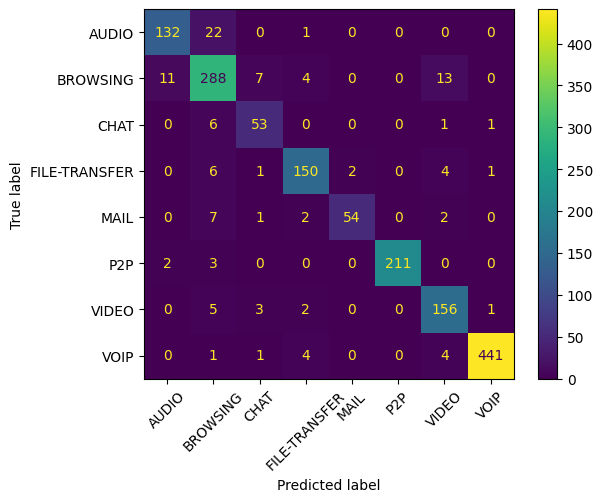

In [60]:
labels = ['AUDIO', 'BROWSING', 'CHAT', 'FILE-TRANSFER', 'MAIL', 'P2P', 'VIDEO', 'VOIP']

y_original = label_encoder.inverse_transform(y_pred7.reshape(-1, 1))

print(classification_report(y_test.values.ravel(), y_original))

# Creazione della matrice di confusione
conf_matrix = confusion_matrix(y_test_encoded, y_pred7)

# Creazione della heatmap per la matrice di confusione
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp_rf.plot(xticks_rotation=45)

In [57]:
print(y_test.values.ravel())

['VIDEO' 'AUDIO' 'BROWSING' ... 'P2P' 'MAIL' 'VOIP']


# **Random Forest (RF)🌲🌳🌲**

*In 'RandomForestClassifier()' di scikit-learn, sia il Bagging (Bootstrap Aggregating) che il Feature Randomness sono attivati di default. Questo significa che durante la costruzione di ciascun albero decisionale, vengono utilizzati un sottoinsieme casuale di features in ogni nodo e il campionamento con reinserimento (Bootstrap Sampling) viene applicato ai dati di addestramento.*

In [ ]:
# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

t14 = time.monotonic()
random_forest_model.fit(X_train_standardized, y_train.values.ravel())
t15 = time.monotonic()

print('Time to train the model: {} seconds'.format(t15 - t14))

t16 = time.monotonic()
y_pred5 = random_forest_model.predict(X_test_standardized)
t17 = time.monotonic()

print('Time to predict labels for {} samples: {} seconds'.format(X_test_standardized.shape[0], t17 - t16))

Time to train the model: 1.9968210770000496 seconds
Time to predict labels for 1603 samples: 0.04253528899994308 seconds


               precision    recall  f1-score   support

        AUDIO       0.91      0.87      0.89       155
     BROWSING       0.86      0.90      0.88       323
         CHAT       0.85      0.84      0.84        61
FILE-TRANSFER       0.94      0.90      0.92       164
         MAIL       0.93      0.80      0.86        66
          P2P       1.00      0.97      0.99       216
        VIDEO       0.81      0.90      0.85       167
         VOIP       0.99      0.97      0.98       451

     accuracy                           0.92      1603
    macro avg       0.91      0.90      0.90      1603
 weighted avg       0.92      0.92      0.92      1603



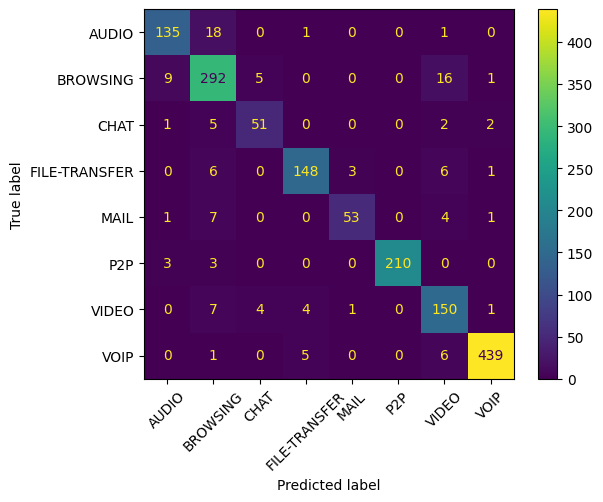

In [ ]:
# Creazione della heatmap per la matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred5)

# Creazione della heatmap per la matrice di confusione
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=random_forest_model.classes_)
disp_rf.plot(xticks_rotation=45)

# Stampa il rapporto di classificazione
print(classification_report(y_test, y_pred5))

*Esiste una variante di XGBoost chiamata XGBoost RF (XGBoost Random Forest), che combina le caratteristiche di XGBoost con l'approccio di Random Forest.*

*Mentre XGBClassifier utilizza alberi decisionali addestrati sequenzialmente tramite il boosting, XGBRFClassifier utilizza l'approccio di random forest per ottenere una diversa prospettiva sull'ensemble learning.*

In [69]:
# Creazione di un oggetto LabelEncoder
label_encoder = LabelEncoder()

# Trasformazione delle etichette di classe in valori numerici
y_train_encoded = label_encoder.fit_transform(y_train.values.ravel())
y_test_encoded = label_encoder.transform(y_test.values.ravel())

xgb_rf_model = xgb.XGBRFClassifier(n_estimators=100, random_state=42)

# Fit
t18 = time.monotonic()
xgb_rf_model.fit(X_train_standardized, y_train_encoded)
t19 = time.monotonic()

print('Time to train the model: {} seconds'.format(t19 - t18))

# Predict
t20 = time.monotonic()
y_pred6 = xgb_rf_model.predict(X_test_standardized)
t21 = time.monotonic()

print('Time to predict labels for {} samples: {} seconds'.format(X_test_standardized.shape[0], t21 - t20))

Time to train the model: 1.3948642900004415 seconds
Time to predict labels for 1603 samples: 0.02535977100069431 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


               precision    recall  f1-score   support

        AUDIO       0.88      0.81      0.84       155
     BROWSING       0.81      0.87      0.84       323
         CHAT       0.84      0.69      0.76        61
FILE-TRANSFER       0.86      0.87      0.86       164
         MAIL       0.92      0.67      0.77        66
          P2P       0.99      0.97      0.98       216
        VIDEO       0.77      0.87      0.82       167
         VOIP       0.98      0.98      0.98       451

     accuracy                           0.89      1603
    macro avg       0.88      0.84      0.86      1603
 weighted avg       0.90      0.89      0.89      1603



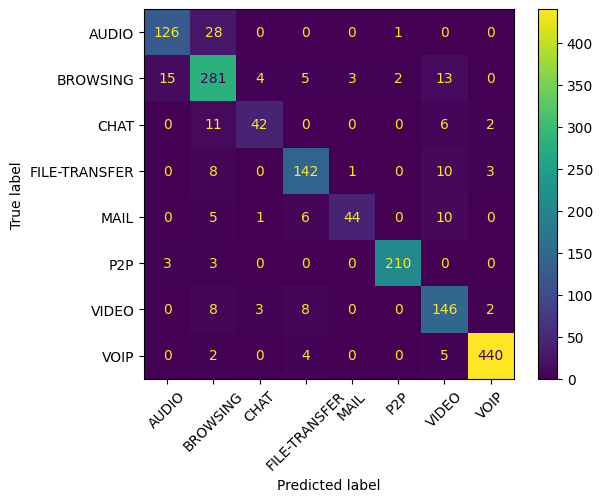

In [70]:
y_original = label_encoder.inverse_transform(y_pred6.reshape(-1, 1))

print(classification_report(y_test.values.ravel(), y_original))

# Creazione della matrice di confusione
conf_matrix = confusion_matrix(y_test_encoded, y_pred6)

# Creazione della heatmap per la matrice di confusione
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp_rf.plot(xticks_rotation=45)